In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from WindPy import w
import datetime
%matplotlib inline

In [2]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [247]:
df = pd.read_excel('D:/workspace/zjsxzy_in_js/website/everyday-update/data/881001.WI.xlsx')

In [248]:
df.tail()

,turnover days,current return,profit percentage
2019-02-19,66.934233,0.035647,0.719740
2019-02-20,66.333052,0.035790,0.719171
2019-02-21,65.377740,0.029248,0.656574
2019-02-22,64.541315,0.048066,0.781949
2019-02-25,62.367903,0.092287,0.913336


In [249]:
data = w.wsd('881001.WI', 'close', df.index[0], df.index[-1])

In [250]:
wdf = pd.DataFrame(np.array(data.Data[0]), index=data.Times, columns=['close'])

In [453]:
window = 60

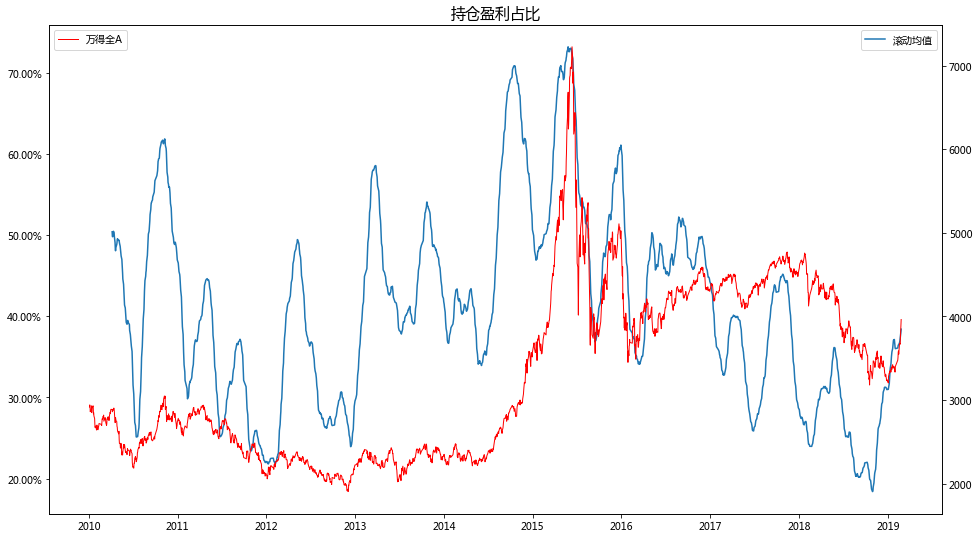

In [457]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1, 1, 1)
# ax.plot(df.index, df['profit percentage'], label=u'持仓盈亏')
ax.plot(df.index, df['profit percentage'].rolling(window).mean(), label=u'滚动均值')
# ax.plot(df.index, df['profit percentage'].rolling(20).mean())
# ax.plot(df.index, pd.Series(0.3, df.index), label=u'下限')
# ax.plot(df.index, pd.Series(0.5, df.index), label=u'上限')
ax.legend()
ax.set_title(u'持仓盈利占比', fontsize=15)
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
ax2 = ax.twinx()
ax2.plot(wdf.index, wdf['close'], label=u'万得全A', color='red', linewidth=1)
ax2.legend(loc='upper left')

In [361]:
st_li = pd.read_excel('D:/workspace/zjsxzy_in_js/website/everyday-update/data/amihud_liquidity.xlsx')

In [362]:
st_li['liquidity'] = st_li['wdqa_corwin and schultz'].rolling(window).mean().pct_change(window)

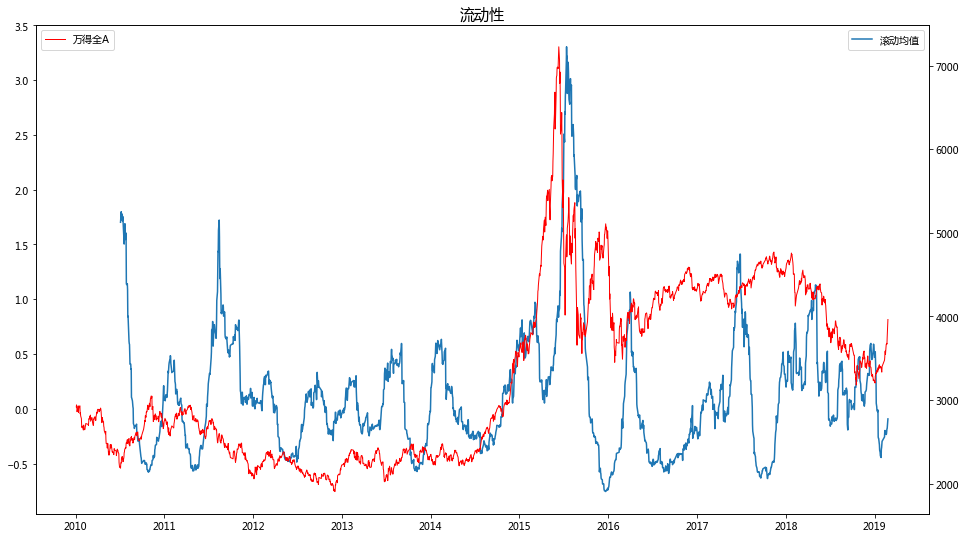

In [464]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1, 1, 1)
ax.plot(st_li.index, st_li['liquidity'], label=u'滚动均值')
ax.legend()
ax.set_title(u'流动性', fontsize=15)
ax2 = ax.twinx()
ax2.plot(wdf.index, wdf['close'], label=u'万得全A', color='red', linewidth=1)
ax2.legend(loc='upper left')

# 持仓盈亏回测

In [458]:
df['hold'] = 0
hold = False
df['roll mean'] = df['profit percentage'].rolling(window).mean()

In [459]:
up_threshold, down_threshold = .55, .3
hold = 0
for date in df.index:
    df.loc[date, 'hold'] = hold
    if hold == 0:
        if df.loc[date]['roll mean'] < down_threshold:
            print date, "buy"
            hold = 1
        elif df.loc[date]['roll mean'] < df[df.index <= date][-242:]['roll mean'].max() - 0.2:
            print date, "buy"
            hold = 1
    else:
        if df.loc[date]['roll mean'] > up_threshold:
            print date, "sell"
            hold = 0
        elif df.loc[date]['roll mean'] > df[df.index <= date][-242:]['roll mean'].min() + 0.2:
            print date, "sell"
            hold = 0

2010-07-05 00:00:00 buy
2010-08-24 00:00:00 sell
2011-01-18 00:00:00 buy
2012-04-05 00:00:00 sell
2012-08-01 00:00:00 buy
2013-02-06 00:00:00 sell
2013-07-01 00:00:00 buy
2013-09-16 00:00:00 sell
2014-01-10 00:00:00 buy
2014-08-15 00:00:00 sell
2014-12-31 00:00:00 buy
2015-03-16 00:00:00 sell
2015-08-03 00:00:00 buy
2015-11-25 00:00:00 sell
2016-01-12 00:00:00 buy
2019-02-25 00:00:00 sell


In [460]:
df['hold'].sum()

1535

In [461]:
portfolio_ret = df['hold'] * wdf['close'].pct_change()

In [462]:
acc = (1 + portfolio_ret).cumprod()

Text(0.5,1,u'\u7ec4\u5408\u8868\u73b0')

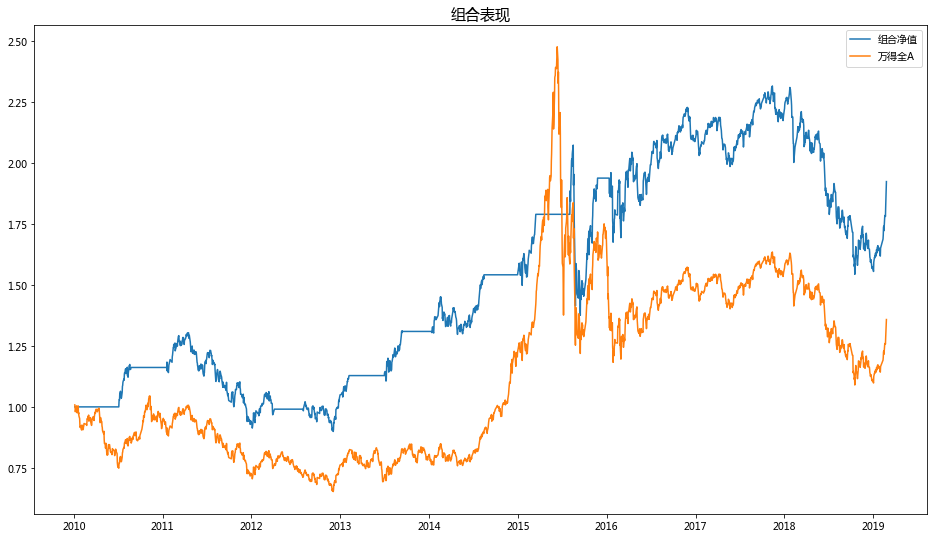

In [463]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1, 1, 1)
ax.plot(acc, label=u'组合净值')
ax.plot((1 + wdf['close'].pct_change()).cumprod(), label=u'万得全A')
ax.legend()
ax.set_title(u'组合表现', fontsize=15)